###**Q1**.  Use [Lucidchart](https://sjsu.edu/it/services/applications/lucidchart.php) to create an Entity Relationship Diagram (ERD) for the following tables representing a customer order tracking system:

Tables and fields:
1. product:
    - product_id: INTEGER (Primary key)
    - name: TEXT not null
    - price: REAL


2. customer:
    - customer_id: INTEGER (Primary key)
    - name: TEXT not null
    - email: TEXT not null


3. purchase_order:
    - order_id: INTEGER (Primary key)
    - customer_id: INTEGER (Foreign key)
    - date: TEXT not null ("YYYY-MM-DD")


4. order_item:
    - order_id: INTEGER (Foreign key)
    - product_id: INTEGER (Foreign key)
    - quantity: INTEGER
    


Export the ERD as PDF and submit it in Canvas.

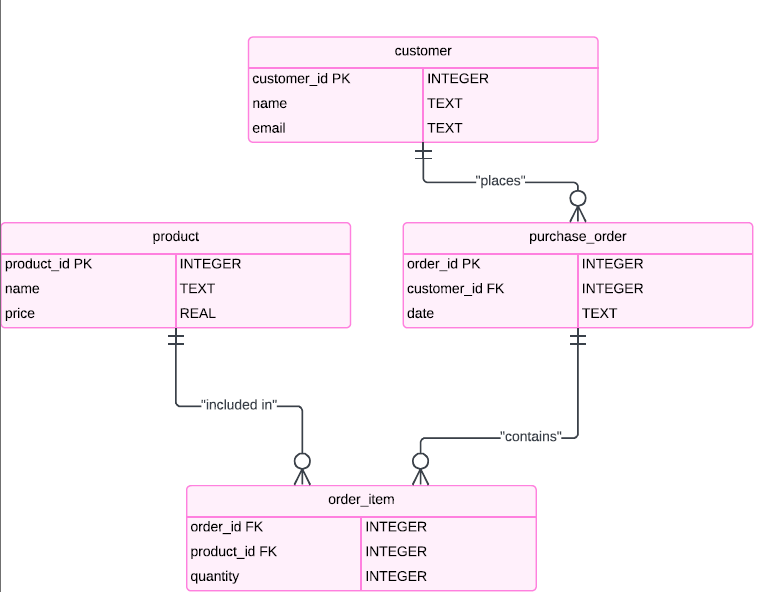

###**Q2**. Create SQLite tables and load data
1. Here are the csv files for the data for the four tables:
   - product: https://raw.githubusercontent.com/csbfx/cs133/main/product.csv
   - customer: https://raw.githubusercontent.com/csbfx/cs133/main/customer.csv
   - order_item: https://raw.githubusercontent.com/csbfx/cs133/main/order_item.csv
   - purchase_order: https://raw.githubusercontent.com/csbfx/cs133/main/purchase_order.csv
2. In this notebook, create the database and save it in a file called `store.db`, and create the four tables as described above.
3. Load the data in the csv files into the corresponding table.
4. Commit so that the data loaded to the tables to officially written to the tables.
5. Execute a query SELECT * from each table to make sure the data are properly loaded.
6. Execute a query using SELECT statement that queries with JOIN tables to find the purchase date, the products and quantities that a particular customer has purchased.

In [7]:
# 2.2 Create the database and save it in a file called store.db, and create the four tables as described above.
# Your code here . . .
import sqlite3

# Connect to SQLite database (creates store.db file if it doesn't exist)
conn = sqlite3.connect('store.db')
cursor = conn.cursor()

# Create the 'product' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS product (
    product_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    price REAL
)
''')

# Create the 'customer' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS customer (
    customer_id INTEGER PRIMARY KEY,
    name TEXT NOT NULL,
    email TEXT NOT NULL
)
''')

# Create the 'purchase_order' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS purchase_order (
    order_id INTEGER PRIMARY KEY,
    customer_id INTEGER,
    date TEXT NOT NULL,
    FOREIGN KEY (customer_id) REFERENCES customer (customer_id)
)
''')

# Create the 'order_item' table
cursor.execute('''
CREATE TABLE IF NOT EXISTS order_item (
    order_id INTEGER,
    product_id INTEGER,
    quantity INTEGER,
    FOREIGN KEY (order_id) REFERENCES purchase_order (order_id),
    FOREIGN KEY (product_id) REFERENCES product (product_id)
)
''')

# Commit the changes and close the connection
conn.commit()
conn.close()

print("Database 'store.db' created with the four tables.")


Database 'store.db' created with the four tables.


In [8]:
# 2.3 Load the data in the csv files into the corresponding table.
# Your code here . . .
import sqlite3
import pandas as pd

# URLs for the CSV files on GitHub
product_url = 'https://raw.githubusercontent.com/csbfx/cs133/main/product.csv'
customer_url = 'https://raw.githubusercontent.com/csbfx/cs133/main/customer.csv'
order_item_url = 'https://raw.githubusercontent.com/csbfx/cs133/main/order_item.csv'
purchase_order_url = 'https://raw.githubusercontent.com/csbfx/cs133/main/purchase_order.csv'

# Connect to the store.db database
conn = sqlite3.connect('store.db')

# Load data from each CSV URL into its corresponding table
# Load product data
product_data = pd.read_csv(product_url)
product_data.to_sql('product', conn, if_exists='replace', index=False)

# Load customer data
customer_data = pd.read_csv(customer_url)
customer_data.to_sql('customer', conn, if_exists='replace', index=False)

# Load purchase_order data
purchase_order_data = pd.read_csv(purchase_order_url)
purchase_order_data.to_sql('purchase_order', conn, if_exists='replace', index=False)

# Load order_item data
order_item_data = pd.read_csv(order_item_url)
order_item_data.to_sql('order_item', conn, if_exists='replace', index=False)



4

In [9]:
# 2.4 Commit so that the data loaded to the tables to officially written to the tables.
# Your code here . . .
# Commit changes and close the connection
conn.commit()
conn.close()

print("Data loaded into 'store.db' tables successfully from GitHub URLs.")

Data loaded into 'store.db' tables successfully from GitHub URLs.


In [10]:
# 2.5 Execute a query SELECT * from each table to make sure the data are properly loaded.
# Your code here . . .
import sqlite3
import pandas as pd

# Connect to the store.db database
conn = sqlite3.connect('store.db')

# Query and display data from each table
tables = ['product', 'customer', 'purchase_order', 'order_item']
for table in tables:
    print(f"Data from {table} table:")
    data = pd.read_sql_query(f"SELECT * FROM {table};", conn)
    print(data)
    print("\n" + "="*50 + "\n")  # Separator for readability

# Close the connection
conn.close()

Data from product table:
   product_id     name  price
0           0  bicycle    400
1           1   helmet     45
2           2   gloves     23
3           3    chain     48


Data from customer table:
   customer_id               name            email
0            0          Wendy Lee    wlee@bike.com
1            1        Jason Brown     jb@speed.com
2            2       Harry Potter  hp@hogwarts.edu
3            3  Godric Gryffindor  gg@hogwards.edu


Data from purchase_order table:
   order_id  customer_id        date
0         0            0  2020-10-19
1         1            0  2020-10-20
2         2            1  2020-10-20


Data from order_item table:
   order_id  product_id  quantity
0         0           0         1
1         0           1         1
2         1           2         2
3         1           3         1




In [11]:
# 2.6 Execute a query using SELECT statement that queries with JOIN tables to find the purchase date,
#    the products and quantities that a particular customer has purchased.
# Query 1: ???
# Query 2: ???
# Your code here . . .
import sqlite3
import pandas as pd

# Connect to the store.db database
conn = sqlite3.connect('store.db')

# Query 1: List of purchases by a particular customer
customer_name = "Customer_Name"  # Replace with the actual customer name you want to search for
query1 = f'''
SELECT
    customer.name AS customer_name,
    purchase_order.date AS purchase_date,
    product.name AS product_name,
    order_item.quantity AS quantity
FROM
    customer
JOIN
    purchase_order ON customer.customer_id = purchase_order.customer_id
JOIN
    order_item ON purchase_order.order_id = order_item.order_id
JOIN
    product ON order_item.product_id = product.product_id
WHERE
    customer.name = '{customer_name}';
'''

# Execute and display Query 1 results
print("Query 1: Purchases by a particular customer")
result1 = pd.read_sql_query(query1, conn)
print(result1)

# Query 2: List of all customers and their purchases
query2 = '''
SELECT
    customer.name AS customer_name,
    purchase_order.date AS purchase_date,
    product.name AS product_name,
    order_item.quantity AS quantity
FROM
    customer
JOIN
    purchase_order ON customer.customer_id = purchase_order.customer_id
JOIN
    order_item ON purchase_order.order_id = order_item.order_id
JOIN
    product ON order_item.product_id = product.product_id
ORDER BY
    customer.name, purchase_order.date;
'''

# Execute and display Query 2 results
print("\nQuery 2: List of all customers and their purchases")
result2 = pd.read_sql_query(query2, conn)
print(result2)

# Close the connection
conn.close()


Query 1: Purchases by a particular customer
Empty DataFrame
Columns: [customer_name, purchase_date, product_name, quantity]
Index: []

Query 2: List of all customers and their purchases
  customer_name purchase_date product_name  quantity
0     Wendy Lee    2020-10-19      bicycle         1
1     Wendy Lee    2020-10-19       helmet         1
2     Wendy Lee    2020-10-20       gloves         2
3     Wendy Lee    2020-10-20        chain         1


In [12]:
# Additional tasks
# Appending a new row to one of the tables
import sqlite3

# Connect to the store.db database
conn = sqlite3.connect('store.db')
cursor = conn.cursor()

# Append a new row to the 'product' table
new_product = (5, 'New Product', 19.99)  # Replace with appropriate values
cursor.execute('''
INSERT INTO product (product_id, name, price)
VALUES (?, ?, ?)
''', new_product)

# Commit changes
conn.commit()
print("New row added to 'product' table.")

# Close the connection
conn.close()




# Deleting row(s) with "XXX"
# Connect to the store.db database
conn = sqlite3.connect('store.db')
cursor = conn.cursor()

# Delete rows in the 'product' table where name is "XXX"
cursor.execute('''
DELETE FROM product
WHERE name = "XXX"
''')

# Delete rows in the 'customer' table where name is "XXX"
cursor.execute('''
DELETE FROM customer
WHERE name = "XXX"
''')

# Commit changes
conn.commit()
print('Rows with "XXX" deleted from relevant tables.')

# Close the connection
conn.close()

New row added to 'product' table.
Rows with "XXX" deleted from relevant tables.
